## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128], layers= 4, drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        elif i < layers:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
from keras.layers import Dropout

### 比較不同層數和dropout rate

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
layers = [2, 3, 4]
Dropout_EXP = [0.2, 0.3, 0.4]

for layer in layers:
    for drp_ratio in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with {} layers and dropout ratio = {}'.format(layer, drp_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], layers=layer, drp_ratio=drp_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
            # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-{} layers-drp={}".format(layer, drp_ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with 2 layers and dropout ratio = 0.2
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
______________________________________

50000/50000 [==============================] - 3s 57us/step - loss: 1.2563 - acc: 0.5564 - val_loss: 1.3173 - val_acc: 0.5338
Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2466 - acc: 0.5602 - val_loss: 1.3079 - val_acc: 0.5389
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2453 - acc: 0.5596 - val_loss: 1.3100 - val_acc: 0.5344
Epoch 47/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.2376 - acc: 0.5628 - val_loss: 1.3075 - val_acc: 0.5345
Epoch 48/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2310 - acc: 0.5656 - val_loss: 1.3030 - val_acc: 0.5392
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2163 - acc: 0.5701 - val_loss: 1.2998 - val_acc: 0.5367
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2148 - acc: 0.5701 - val_loss: 1.3037 - val_acc: 0.5415
Experiment with 2 layers and dropout ratio = 0

50000/50000 [==============================] - 3s 63us/step - loss: 1.3277 - acc: 0.5305 - val_loss: 1.3357 - val_acc: 0.5248
Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3165 - acc: 0.5323 - val_loss: 1.3289 - val_acc: 0.5288
Epoch 46/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3133 - acc: 0.5371 - val_loss: 1.3325 - val_acc: 0.5279
Epoch 47/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3063 - acc: 0.5393 - val_loss: 1.3250 - val_acc: 0.5280
Epoch 48/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3048 - acc: 0.5400 - val_loss: 1.3182 - val_acc: 0.5351
Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2937 - acc: 0.5393 - val_loss: 1.3162 - val_acc: 0.5311
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2919 - acc: 0.5415 - val_loss: 1.3176 - val_acc: 0.5282
Experiment with 2 layers and dropout ratio = 0

50000/50000 [==============================] - 3s 53us/step - loss: 1.4056 - acc: 0.5009 - val_loss: 1.3652 - val_acc: 0.5149
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4025 - acc: 0.5042 - val_loss: 1.3605 - val_acc: 0.5208
Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.3974 - acc: 0.5057 - val_loss: 1.3625 - val_acc: 0.5218
Epoch 47/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3917 - acc: 0.5065 - val_loss: 1.3568 - val_acc: 0.5228
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3872 - acc: 0.5083 - val_loss: 1.3544 - val_acc: 0.5191
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3797 - acc: 0.5123 - val_loss: 1.3569 - val_acc: 0.5158
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3777 - acc: 0.5099 - val_loss: 1.3462 - val_acc: 0.5203
Experiment with 3 layers and dropout ratio = 0

50000/50000 [==============================] - 3s 59us/step - loss: 1.2615 - acc: 0.5510 - val_loss: 1.3094 - val_acc: 0.5315
Epoch 43/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.2555 - acc: 0.5527 - val_loss: 1.3022 - val_acc: 0.5345
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2564 - acc: 0.5558 - val_loss: 1.2987 - val_acc: 0.5379
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.2419 - acc: 0.5582 - val_loss: 1.3050 - val_acc: 0.5353
Epoch 46/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2326 - acc: 0.5607 - val_loss: 1.2912 - val_acc: 0.5338
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2263 - acc: 0.5625 - val_loss: 1.2816 - val_acc: 0.5444
Epoch 48/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2223 - acc: 0.5633 - val_loss: 1.3075 - val_acc: 0.5335
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 57us/step - loss: 1.3828 - acc: 0.5049 - val_loss: 1.3604 - val_acc: 0.5149
Epoch 41/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3805 - acc: 0.5069 - val_loss: 1.3478 - val_acc: 0.5194
Epoch 42/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3657 - acc: 0.5106 - val_loss: 1.3445 - val_acc: 0.5171
Epoch 43/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3642 - acc: 0.5112 - val_loss: 1.3422 - val_acc: 0.5135
Epoch 44/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3611 - acc: 0.5119 - val_loss: 1.3450 - val_acc: 0.5184
Epoch 45/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3554 - acc: 0.5156 - val_loss: 1.3454 - val_acc: 0.5178
Epoch 46/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3472 - acc: 0.5144 - val_loss: 1.3298 - val_acc: 0.5233
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 56us/step - loss: 1.5028 - acc: 0.4627 - val_loss: 1.4130 - val_acc: 0.4939
Epoch 39/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5001 - acc: 0.4648 - val_loss: 1.4096 - val_acc: 0.4988
Epoch 40/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4847 - acc: 0.4688 - val_loss: 1.4114 - val_acc: 0.4942
Epoch 41/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4823 - acc: 0.4691 - val_loss: 1.4117 - val_acc: 0.4939
Epoch 42/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4833 - acc: 0.4698 - val_loss: 1.4060 - val_acc: 0.4942
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4718 - acc: 0.4731 - val_loss: 1.3995 - val_acc: 0.4989
Epoch 44/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4670 - acc: 0.4775 - val_loss: 1.4038 - val_acc: 0.4965
Epoch 45/50
50000/50000 [=====================

Epoch 35/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3625 - acc: 0.5158 - val_loss: 1.3549 - val_acc: 0.5160
Epoch 36/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3552 - acc: 0.5162 - val_loss: 1.3532 - val_acc: 0.5146
Epoch 37/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3470 - acc: 0.5185 - val_loss: 1.3642 - val_acc: 0.5135
Epoch 38/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3451 - acc: 0.5184 - val_loss: 1.3448 - val_acc: 0.5160
Epoch 39/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3356 - acc: 0.5210 - val_loss: 1.3463 - val_acc: 0.5195
Epoch 40/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3281 - acc: 0.5243 - val_loss: 1.3417 - val_acc: 0.5207
Epoch 41/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3197 - acc: 0.5285 - val_loss: 1.3501 - val_acc: 0.5242
Epoch 42/50
50000/50000 [=========

50000/50000 [==============================] - 3s 58us/step - loss: 1.5100 - acc: 0.4578 - val_loss: 1.4283 - val_acc: 0.4930
Epoch 32/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5044 - acc: 0.4630 - val_loss: 1.4231 - val_acc: 0.4939
Epoch 33/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4963 - acc: 0.4628 - val_loss: 1.4269 - val_acc: 0.4890
Epoch 34/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4891 - acc: 0.4672 - val_loss: 1.4137 - val_acc: 0.4979
Epoch 35/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4864 - acc: 0.4676 - val_loss: 1.4110 - val_acc: 0.4967
Epoch 36/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4759 - acc: 0.4714 - val_loss: 1.4136 - val_acc: 0.4928
Epoch 37/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4681 - acc: 0.4746 - val_loss: 1.4060 - val_acc: 0.4958
Epoch 38/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 57us/step - loss: 1.6650 - acc: 0.4011 - val_loss: 1.5359 - val_acc: 0.4523
Epoch 28/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6542 - acc: 0.4015 - val_loss: 1.5283 - val_acc: 0.4522
Epoch 29/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6454 - acc: 0.4082 - val_loss: 1.5196 - val_acc: 0.4589
Epoch 30/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6370 - acc: 0.4100 - val_loss: 1.5124 - val_acc: 0.4643
Epoch 31/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6286 - acc: 0.4111 - val_loss: 1.5143 - val_acc: 0.4598
Epoch 32/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6226 - acc: 0.4149 - val_loss: 1.5032 - val_acc: 0.4632
Epoch 33/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6190 - acc: 0.4183 - val_loss: 1.5070 - val_acc: 0.4633
Epoch 34/50
50000/50000 [=====================

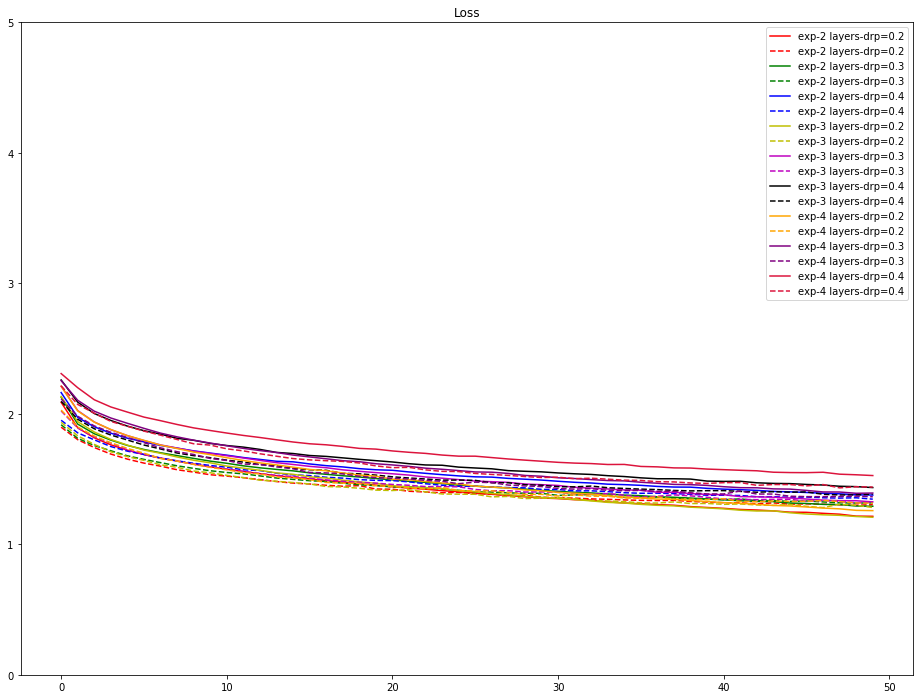

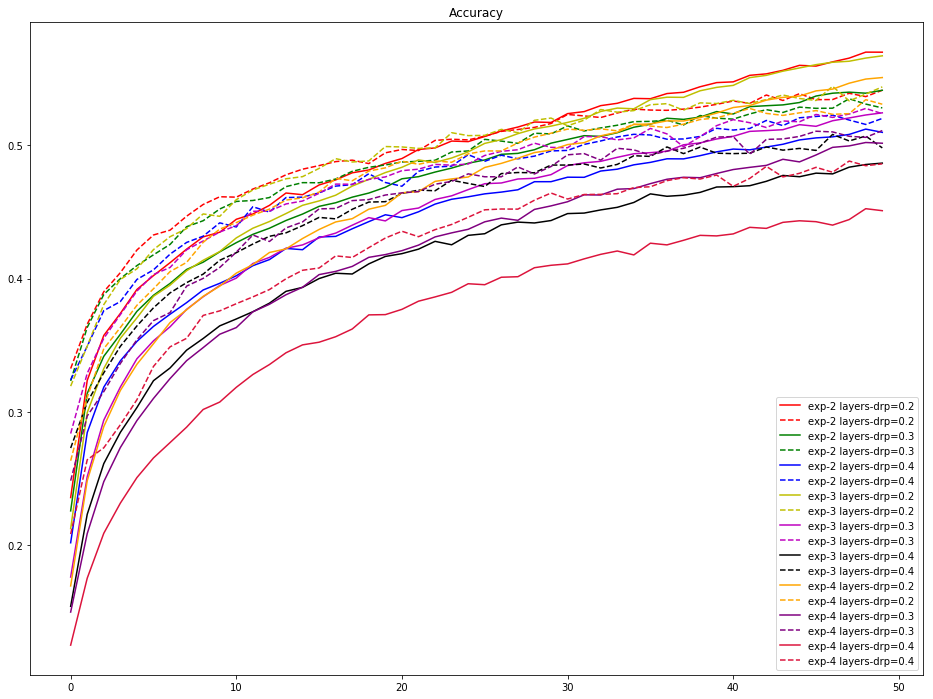

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "orange", "purple", "crimson"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### optimizer改成adam

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
layers = [2, 3, 4]
Dropout_EXP = [0.2, 0.3, 0.4]

for layer in layers:
    for drp_ratio in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with {} layers and dropout ratio = {}'.format(layer, drp_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], layers=layer, drp_ratio=drp_ratio)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
            # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-{} layers-drp={}".format(layer, drp_ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with 2 layers and dropout ratio = 0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.0350 - acc: 0.2608 - val_loss: 1.8586 - val_acc: 0.3246
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8663 - acc: 0.3250 - val_loss: 1.7614 - val_acc: 0.3738
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8247 - acc: 0.3391 - val_loss: 1.7228 - val_acc: 0.3944
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7932 - acc: 0.3531 - val_loss: 1.6733 - val_acc: 0.4042
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7583 - acc: 0.3665 - val_loss: 1.6728 - val_acc: 0.4082
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7398 - acc: 0.3712 - val_loss: 1.6566 - val_acc: 0.4217
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7191 - acc: 0.3791 - val_loss: 1.6602 - val_acc

50000/50000 [==============================] - 4s 70us/step - loss: 2.1095 - acc: 0.2199 - val_loss: 1.8700 - val_acc: 0.3235
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9393 - acc: 0.2836 - val_loss: 1.8164 - val_acc: 0.3467
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.9017 - acc: 0.3003 - val_loss: 1.7893 - val_acc: 0.3655
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8769 - acc: 0.3119 - val_loss: 1.7860 - val_acc: 0.3742
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8554 - acc: 0.3209 - val_loss: 1.7814 - val_acc: 0.3777
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8296 - acc: 0.3303 - val_loss: 1.7670 - val_acc: 0.3882
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8242 - acc: 0.3348 - val_loss: 1.7639 - val_acc: 0.3783
Epoch 8/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0153 - acc: 0.2570 - val_loss: 1.7890 - val_acc: 0.3622
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8127 - acc: 0.3480 - val_loss: 1.7031 - val_acc: 0.3971
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7535 - acc: 0.3659 - val_loss: 1.6144 - val_acc: 0.4200
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7090 - acc: 0.3803 - val_loss: 1.6100 - val_acc: 0.4250
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6779 - acc: 0.3943 - val_loss: 1.5559 - val_acc: 0.4431
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6507 - acc: 0.4051 - val_loss: 1.5417 - val_acc: 0.4506
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6290 - acc: 0.4111 - val_loss: 1.5415 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0496 - acc: 0.2361 - val_loss: 1.8594 - val_acc: 0.3207
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8983 - acc: 0.3066 - val_loss: 1.7760 - val_acc: 0.3728
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8492 - acc: 0.3226 - val_loss: 1.7633 - val_acc: 0.3785
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8215 - acc: 0.3380 - val_loss: 1.7343 - val_acc: 0.3768
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7924 - acc: 0.3461 - val_loss: 1.7160 - val_acc: 0.3965
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7727 - acc: 0.3549 - val_loss: 1.6774 - val_acc: 0.4167
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7539 - acc: 0.3621 - val_loss: 1.6721 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.1278 - acc: 0.2033 - val_loss: 1.9163 - val_acc: 0.3077
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9771 - acc: 0.2675 - val_loss: 1.8970 - val_acc: 0.3181
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9496 - acc: 0.2742 - val_loss: 1.8748 - val_acc: 0.3438
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9183 - acc: 0.2894 - val_loss: 1.8550 - val_acc: 0.3563
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.9078 - acc: 0.2925 - val_loss: 1.8692 - val_acc: 0.3288
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.8883 - acc: 0.3020 - val_loss: 1.8489 - val_acc: 0.3569
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8839 - acc: 0.3008 - val_loss: 1.8281 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0567 - acc: 0.2351 - val_loss: 1.8921 - val_acc: 0.3175
Epoch 2/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8720 - acc: 0.3194 - val_loss: 1.7471 - val_acc: 0.3740
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8119 - acc: 0.3416 - val_loss: 1.6938 - val_acc: 0.3934
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7725 - acc: 0.3573 - val_loss: 1.6812 - val_acc: 0.3948
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7304 - acc: 0.3752 - val_loss: 1.6565 - val_acc: 0.4044
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7072 - acc: 0.3854 - val_loss: 1.6344 - val_acc: 0.42200s - loss: 1.7078 - acc: 0.38
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6825 - acc: 0.3943

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.1219 - acc: 0.1971 - val_loss: 1.9280 - val_acc: 0.2848
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.9450 - acc: 0.2774 - val_loss: 1.8688 - val_acc: 0.3235
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9071 - acc: 0.2960 - val_loss: 1.8039 - val_acc: 0.3564
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8658 - acc: 0.3143 - val_loss: 1.7714 - val_acc: 0.3626
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8444 - acc: 0.3205 - val_loss: 1.7689 - val_acc: 0.3715
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8199 - acc: 0.3348 - val_loss: 1.7193 - val_acc: 0.3873
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8156 - acc: 0.3395 - val_loss: 1.7355 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.2075 - acc: 0.1567 - val_loss: 2.0448 - val_acc: 0.2363
Epoch 2/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.0435 - acc: 0.2217 - val_loss: 1.9472 - val_acc: 0.2694
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9949 - acc: 0.2391 - val_loss: 1.9317 - val_acc: 0.2757
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9659 - acc: 0.2540 - val_loss: 1.9151 - val_acc: 0.2899
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9504 - acc: 0.2634 - val_loss: 1.9491 - val_acc: 0.2843
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9315 - acc: 0.2708 - val_loss: 1.9389 - val_acc: 0.2876
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9270 - acc: 0.2725 - val_loss: 1.9453 - val_acc

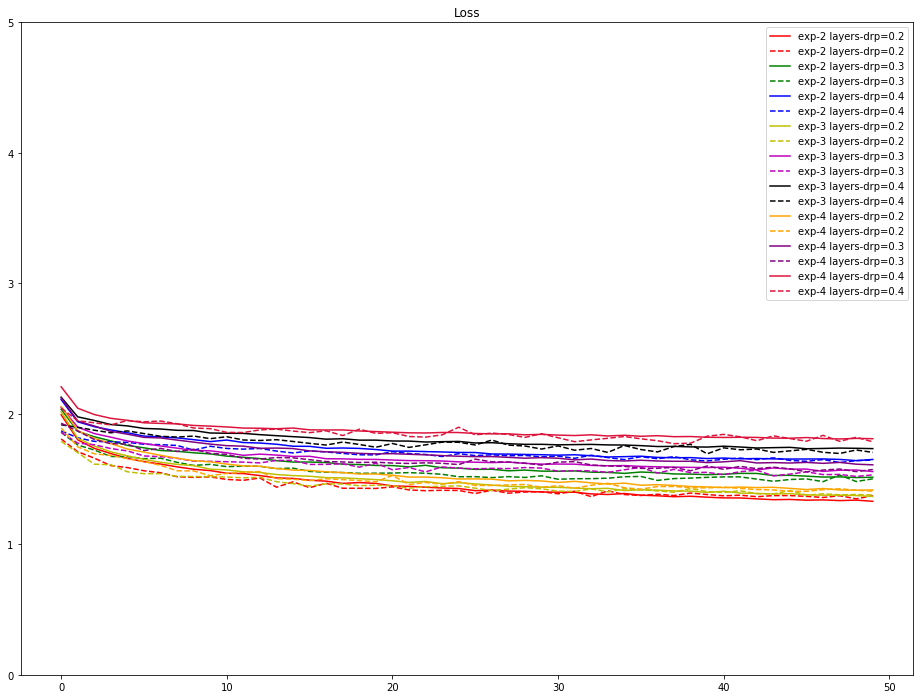

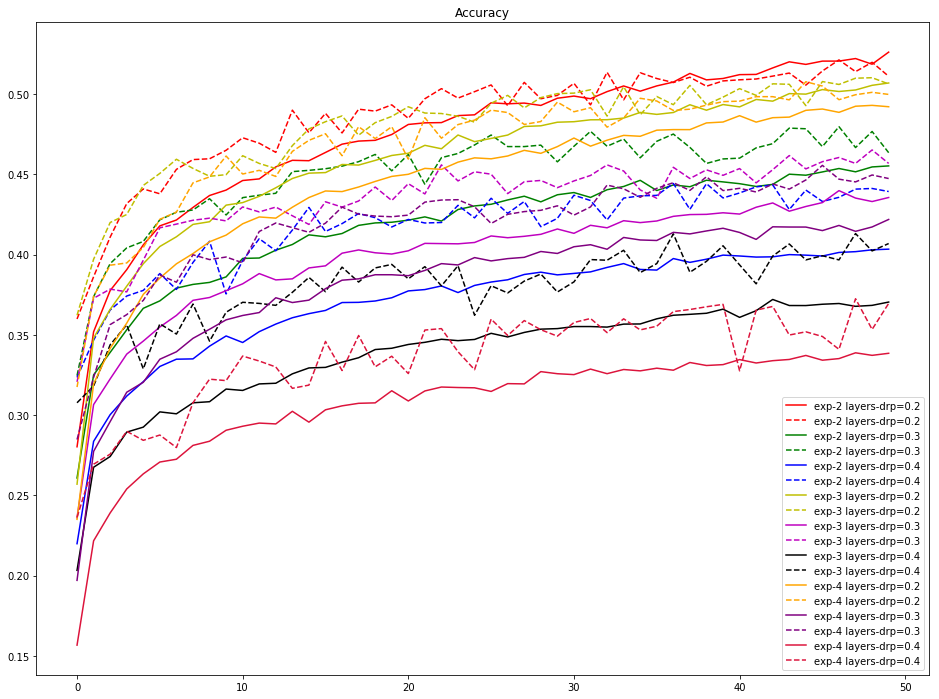

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "orange", "purple", "crimson"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()